In [1]:
import numpy as np, prjlib, plottools as pl, healpy as hp, pickle, curvedsky, tools_lens, binning as bn
from matplotlib.pyplot import *
fig_kwargs = {'ylabsize':18,'xticks_labsize':16,'yticks_labsize':16,'legend_size':14}

In [2]:
pobj, qobj = {}, {}
for ntype in ['base','goal']:
    pobj[ntype] = prjlib.analysis_init(t='la',freq='com',fltr='none',ntype=ntype+'_roll50')
    qobj[ntype] = tools_lens.init_qobj(pobj[ntype].stag,doreal=False,rlmin=300,rlmax=4096,n0max=50)

In [3]:
al, n0, ml, cl, xl, kk = {}, {}, {}, {}, {}, {}
for ntype in ['base','goal']:
    for q in ['TT','TE','EE','EB']:
        cl[ntype+q], xl[ntype+q], kk = np.loadtxt(qobj[ntype].f[q].mcls,unpack=True,usecols=(1,3,4))

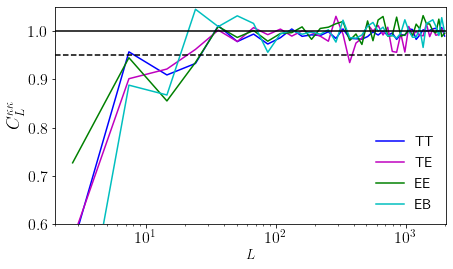

In [30]:
co = rcParams['axes.prop_cycle'].by_key()['color']
l = qobj['base'].l
ntype = 'base'
mb = bn.multipole_binning(40,spc='p2')
pl.plot_1dstyle(fsize=[7,4],ylab='$C_L^{\kappa\kappa}$',usetex=True,xmin=2,xmax=2048,xlog=True,ymin=.6,ymax=1.05,**fig_kwargs)
for i, (q, c) in enumerate(zip(['TT','TE','EE','EB'],['b','m','g','c'])):
    xb = bn.binning(xl[ntype+q],mb)
    kb = bn.binning(kk,mb)
    plot(mb.bc,xb/kb,label=q,color=c)
axhline(1,color='k')
axhline(.95,color='k',ls='--')
legend()
show()